In [1]:
import scipy.sparse
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc('font', family='sans-serif', size=14)

from hw3 import QuadraticProblem, barr_method

In [2]:
n = 10
d = 1000

# random data generation
X = np.random.rand(n, d)
true_w = scipy.sparse.random(d, 1).toarray().reshape(d)
noise = 0.01 * np.random.randn(n)
y = X.dot(true_w) + noise

In [3]:
reg_param = 10.0

Q = 0.5 * np.eye(n)
p = y
A = np.concatenate((X.T, -X.T), axis=0)
b = reg_param * np.ones(2*d)

quadratic_problem = QuadraticProblem(Q, p, A, b)

In [8]:
v0 = np.zeros(n)
t0 = 10.0
eps = 1e-6
eps_centering = 1e-6

obj_tab = []
dual_gap_tab = []
iterations_tab = []
lasso_sol_tab = []

mu_tab = [2, 15, 50, 150, 500]

for mu in mu_tab:
    # barrier method for a certain value of mu
    v_tab, t_tab, inner_steps_tab = barr_method(quadratic_problem, t0, v0, mu, eps, eps_centering)
    
    # saving the objective and the dual gap decrease, as well as the number of Newton iterations
    obj_tab.append([quadratic_problem.compute_obj(v) for v in v_tab])
    dual_gap_tab.append([A.shape[0] / t for t in t_tab])
    iterations_tab.append(inner_steps_tab)
    
    # saving the LASSO solution
    dual_point = - 1 / (t_tab[-1] * (A.dot(v_tab[-1]) - b))
    lasso_sol_tab.append(dual_point[d:] - dual_point[:d])

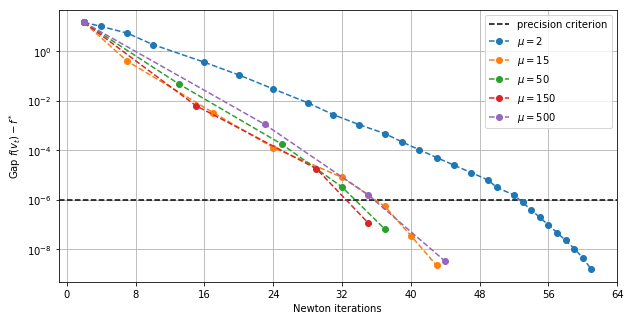

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.axhline(y=eps_centering, xmin=0.0, xmax=1.0, color='black',
           linestyle='dashed', label='precision criterion')

for i in range(len(obj_tab)):
    ax.plot(iterations_tab[i][:-1], obj_tab[i][:-1] - obj_tab[i][-1],
            'o', linestyle='--', label='$\mu={}$'.format(mu_tab[i]))

ax.set_yscale('log')
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax.set_ylabel('Gap $f(v_t)-f^{*}$')
ax.set_xlabel('Newton iterations')

ax.legend()
ax.grid(True)

fig.savefig('curve1.eps');

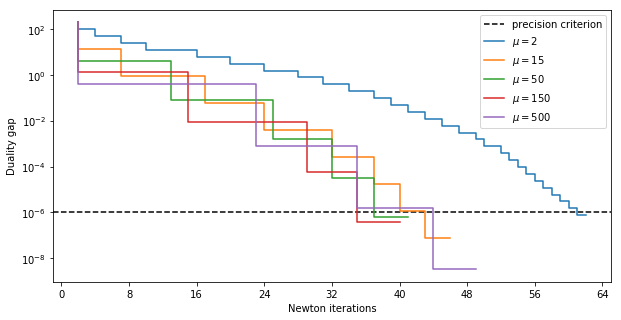

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.axhline(y=eps, xmin=0.0, xmax=1.0, color='black',
           linestyle='dashed', label='precision criterion')

for i in range(len(dual_gap_tab)):
    ax.step(iterations_tab[i], dual_gap_tab[i], label='$\mu={}$'.format(mu_tab[i]))

ax.set_yscale('log')
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax.set_ylabel('Duality gap')
ax.set_xlabel('Newton iterations')
    
ax.legend()

fig.savefig('curve2.eps');

In [14]:
def lasso_objective(w):
    return 0.5 * np.linalg.norm(X.dot(w) - y) ** 2 + reg_param * np.linalg.norm(w, ord=1)

print("Ground truth weights\nLasso objective : {:.2f}\n".format(lasso_objective(true_w)) +
      "data fitting term : {:.2f}\n".format(np.linalg.norm(X.dot(true_w) - y)) +
      "weights L1 norm : {:.2f}\n".format(np.linalg.norm(true_w, ord=1)) +
      "weights support : {}\n".format(np.size(np.where(true_w > 1e-10))))

for i in range(len(lasso_sol_tab)):
    print("mu={}\n LASSO objective {:.2f}\n".format(mu_tab[i], lasso_objective(lasso_sol_tab[i])) +
          "data fitting term : {:.2f}\n".format(np.linalg.norm(X.dot(lasso_sol_tab[i]) - y)) +
          "weights L1 norm : {:.2f}\n".format(np.linalg.norm(lasso_sol_tab[i], ord=1)) +
          "weights support : {}\n".format(np.size(np.where(lasso_sol_tab[i] > 1e-5))))

Ground truth weights
Lasso objective : 51.23
data fitting term : 0.03
weights L1 norm : 5.12
weights support : 10

mu=2
 LASSO objective 25.46
data fitting term : 4.65
weights L1 norm : 1.46
weights support : 4

mu=15
 LASSO objective 25.46
data fitting term : 4.65
weights L1 norm : 1.47
weights support : 4

mu=50
 LASSO objective 25.46
data fitting term : 4.62
weights L1 norm : 1.48
weights support : 4

mu=150
 LASSO objective 25.46
data fitting term : 4.65
weights L1 norm : 1.46
weights support : 4

mu=500
 LASSO objective 25.46
data fitting term : 4.65
weights L1 norm : 1.46
weights support : 4

